# Electron degeneracy derivatives

In [1]:
from sympy import init_session

In [2]:
init_session()

IPython console for SymPy 1.13.1 (Python 3.13.5-64-bit) (ground types: gmpy)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.1/



## Setup the dependencies

We'll have $\rho$ and $T$ be the independent variables.

In [3]:
# Independent variables
rho, T = symbols('rho T')

We'll express $\eta = \eta(\rho, T)$ and $\beta = \beta(T)$ (since $\beta = kT / (m_e c^2)$).

In [4]:
eta = Function('eta')(rho, T)
beta = Function('beta')(T)

In [5]:
# for positrons, we will use eta_tilde in the expressions
eta_tilde_expr = -eta - 2 / beta

## Derivatives of $\eta$ and $\beta$ with respect to $\rho$ and $T$

Finally, we'll write the electron and positron densities as functions of the symbol $\eta$ and $\beta$

In [6]:
# dummy variables for the arguments
eta_sym, beta_sym = symbols('eta beta')
n_e_func = Function('n_e')(eta_sym, beta_sym)
n_p_func = Function('n_p')(eta_sym, beta_sym)

# Now substitute eta(rho, T) and beta(T) into n_e and n_p
n_e_expr = n_e_func.subs({eta_sym: eta, beta_sym: beta})
n_p_expr = n_p_func.subs({eta_sym: eta, beta_sym: beta})

Now we want to construct the expression

$$n_e - n_p = N_A \frac{Z}{A} \rho$$

we'll do this by defining the left and righthand sides separately.

In [7]:
lhs_expr = n_e_expr - n_p_expr

In [8]:
N_A, Z, A = symbols('N_A Z A', constant=True)
rhs_expr = (N_A * Z / A) * rho

## Compute $\partial/\partial T$

In [9]:
lhs_diff = diff(lhs_expr, T)
rhs_diff = diff(rhs_expr, T)

In [10]:
# Solve for ∂η/∂T
deta_dT = symbols('deta_dT')
lhs_diff_sub = lhs_diff.subs(diff(eta, T), deta_dT)
deta_dT_expr = solve(lhs_diff_sub - rhs_diff, deta_dT)[0]

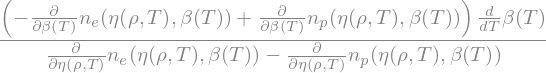

In [11]:
deta_dT_expr

## Compute $\partial/ \partial \rho$

In [12]:
lhs_diff = diff(lhs_expr, rho)
rhs_diff = diff(rhs_expr, rho)

In [13]:
# Solve for ∂η/∂ρ
deta_drho = symbols('deta_drho')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho), deta_drho)
deta_drho_expr = solve(lhs_diff_sub - rhs_diff, deta_drho)[0]

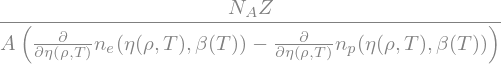

In [14]:
deta_drho_expr

## Compute $\partial^2/\partial T^2$

In [15]:
lhs_diff = diff(lhs_expr, T, T)
rhs_diff = diff(rhs_expr, T, T)

In [16]:
# Solve for ∂²η/∂T²
d2eta_dT2 = symbols('d2eta_dT2')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, T), d2eta_dT2)
d2eta_dT2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dT2)[0]

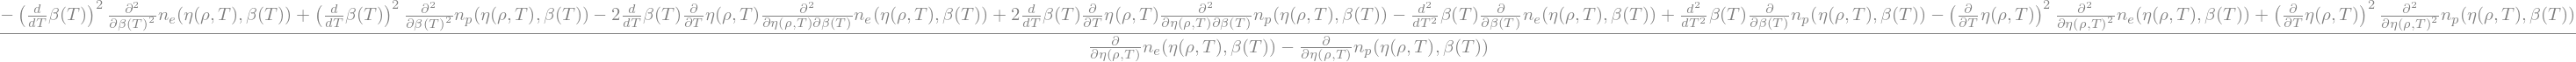

In [17]:
simplify(d2eta_dT2_expr)

## Compute $\partial^2/\partial \rho \partial T$

In [18]:
lhs_diff = diff(lhs_expr, T, rho)
rhs_diff = diff(rhs_expr, T, rho)

In [19]:
# Solve for ∂²η/∂T∂ρ
d2eta_dTdrho = symbols('d2eta_dTdrho')
lhs_diff_sub = lhs_diff.subs(diff(eta, T, rho), d2eta_dTdrho)
d2eta_dTdrho_expr = solve(lhs_diff_sub - rhs_diff, d2eta_dTdrho)[0]

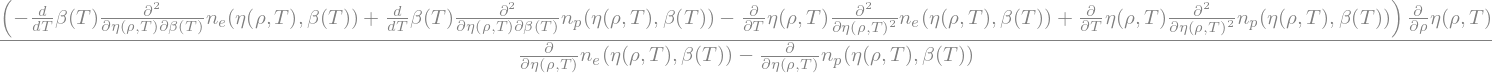

In [20]:
simplify(d2eta_dTdrho_expr)

## Compute $\partial^2/\partial \rho^2$

In [21]:
lhs_diff = diff(lhs_expr, rho, rho)
rhs_diff = diff(rhs_expr, rho, rho)

In [22]:
# Solve for ∂²η/∂ρ²
d2eta_drho2 = symbols('d2eta_drho2')
lhs_diff_sub = lhs_diff.subs(diff(eta, rho, rho), d2eta_drho2)
d2eta_drho2_expr = solve(lhs_diff_sub - rhs_diff, d2eta_drho2)[0]

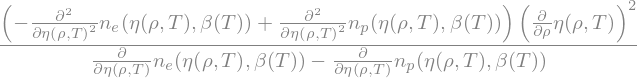

In [23]:
simplify(d2eta_drho2_expr)

## Now the derivatives of the $n_e$ and $n_p$ with respect to $\eta$ and $\beta$

### First $n_e$

In [24]:
F12_func = Function("F_{1/2}")(eta_sym, beta_sym)
F32_func = Function("F_{3/2}")(eta_sym, beta_sym)
F52_func = Function("F_{5/2}")(eta_sym, beta_sym)

F12_expr = F12_func.subs({eta_sym: eta, beta_sym: beta})
F32_expr = F32_func.subs({eta_sym: eta, beta_sym: beta})
F52_expr = F52_func.subs({eta_sym: eta, beta_sym: beta})

now write out what the number densities are

In [25]:
C = symbols("C", constant=True)

In [26]:
n_e_full = C * beta**Rational(3,2) * (F12_expr + beta * F32_expr)

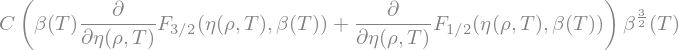

In [27]:
dne_deta = diff(n_e_full, eta)
dne_deta

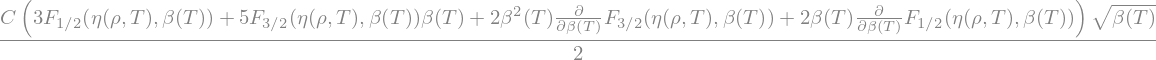

In [28]:
dne_dbeta = diff(n_e_full, beta)
simplify(dne_dbeta)

### Next, $n_p$

In [29]:
F12_tilde_expr = F12_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F32_tilde_expr = F32_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})
F52_tilde_expr = F52_func.subs({eta_sym: eta_tilde_expr, beta_sym: beta})

In [30]:
n_p_full = C * beta**Rational(3,2) * (F12_tilde_expr + beta * F32_tilde_expr)

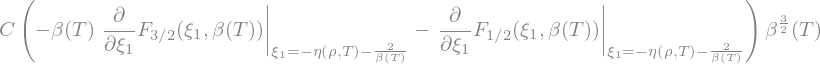

In [31]:
dnp_deta = diff(n_p_full, eta)
dnp_deta

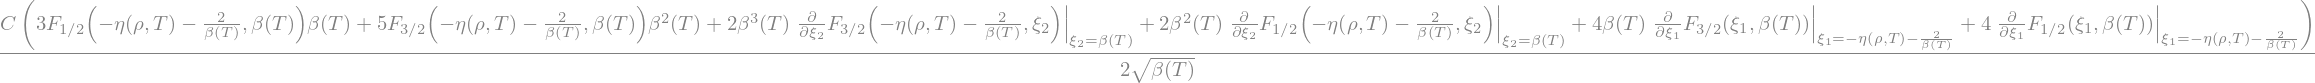

In [32]:
dnp_dbeta = diff(n_p_full, beta)
simplify(dnp_dbeta)

## Now thermodynamic derivatives

In [33]:
A, B = symbols("A B", constant=True)

In [34]:
p_e_full = A * beta**Rational(5,2) * (F32_expr + Rational(1, 2) * beta * F52_expr)
e_e_full = B * beta**Rational(5,2) * (F32_expr + beta * F52_expr) / rho

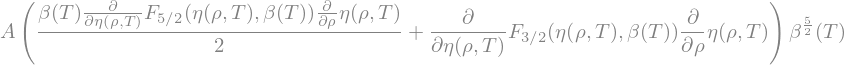

In [35]:
dpe_drho = diff(p_e_full, rho)
dpe_drho

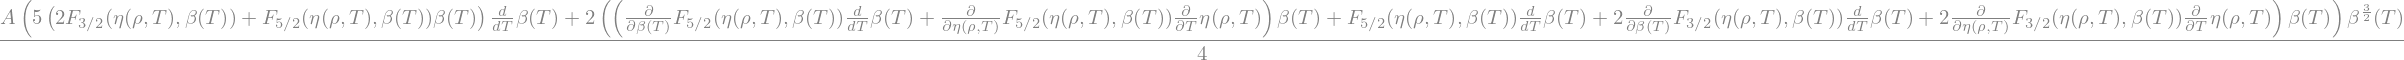

In [36]:
dpe_dT = diff(p_e_full, T)
simplify(dpe_dT)

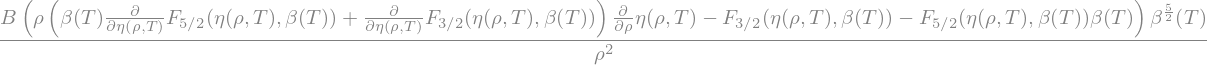

In [37]:
dee_drho = diff(e_e_full, rho)
simplify(dee_drho)

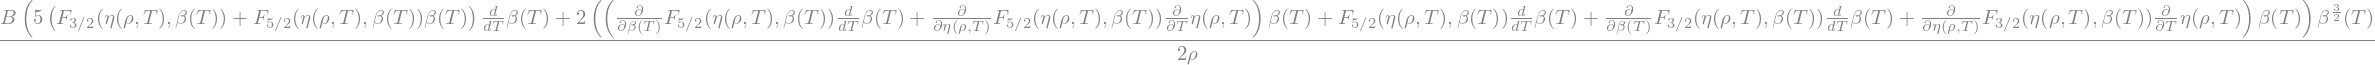

In [38]:
dee_dT = diff(e_e_full, T)
simplify(dee_dT)

In [39]:
Erm = symbols(r"E_{rm}", constants=True)
Erm

In [40]:
p_p_full = A * beta**Rational(5,2) * (F32_tilde_expr + 0.5 * beta * F52_tilde_expr)
e_p_full = B * beta**Rational(5,2) * (F32_tilde_expr + beta * F52_tilde_expr) + 2 * Erm * n_p_full / rho

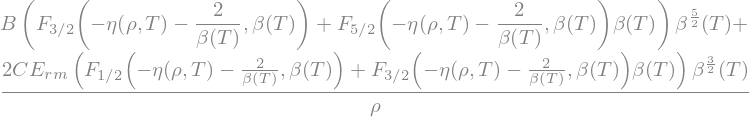

In [41]:
e_p_full